<a href="https://colab.research.google.com/github/khiljaekang/colab/blob/main/%EC%9E%90%EB%8F%99%EC%9C%BC%EB%A1%9C_%EB%AA%A8%EC%9D%80_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%8A%94_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0_%EC%96%B4%EB%A0%B5%EB%8B%A4%EB%A9%B4%EC%84%9C__%EC%9E%90%EB%8F%99%EC%9C%BC%EB%A1%9C_%EB%AA%A8%EC%9D%80_%EC%A4%91%EA%B3%A0_%EC%9E%90%EB%8F%99%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%EB%B6%84%EC%84%9D%ED%95%B4%EB%B3%B4%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 자동으로 모은 데이터는 분석하기 어렵다면서? 자동으로 모은 중고 자동차 데이터를 분석해보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Used Cars Dataset을 사용합니다.
    - 파일은 한 개이며, 각각의 컬럼은 아래와 같습니다.
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 거래가 기입된 년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - XGBoost, LightGBM 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 데이터 스크래핑이 대하여

### 스크래핑을 이용한 자동 데이터 습득

### 스크래핑된 데이터에서 아웃라이어의 특징


## Step 1. 데이터셋 준비하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [3]:
import os

In [4]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'kangkhiljae'
os.environ['KAGGLE_KEY'] = '85e7d48d8e8f4f81887cbc85143a3a0f'



### 문제 2. 데이터 다운로드 및 압축 해제하기


In [5]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
# !rm *.* 데이터 전체삭제
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip '*.zip'




 99% 259M/262M [00:04<00:00, 83.9MB/s]
100% 262M/262M [00:05<00:00, 54.6MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [6]:
df =  pd.read_csv('vehicles.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [11]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기
df.head(100)




,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7309798041,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,2100,2006.0,subaru,impreza,fair,4 cylinders,gas,97000.0,clean,automatic,NaN,NaN,NaN,hatchback,NaN,https://images.craigslist.org/00606_6sZwmmrJ9r...,Looking to sell my 2006 Subaru Impreza hatchba...,NaN,al,32.5475,-85.4682,2021-04-20T09:55:48-0500
96,7309361405,https://auburn.craigslist.org/cto/d/valley-one...,auburn,https://auburn.craigslist.org,80,2004.0,honda,NaN,excellent,6 cylinders,gas,94020.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00p0p_awopHVeMR8...,Asking $800 Loaded 2004 Honda Accord EX-L! 94k...,NaN,al,32.8113,-85.1749,2021-04-19T12:55:06-0500
97,7309271279,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,15990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,29652.0,clean,other,JTNKARJEXGJ517925,fwd,NaN,hatchback,blue,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.4800,2021-04-19T10:51:13-0500
98,7309271051,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,20590,2013.0,acura,mdx sport utility 4d,good,6 cylinders,gas,77087.0,clean,other,2HNYD2H30DH510846,NaN,NaN,other,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.4800,2021-04-19T10:50:57-0500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [12]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [9]:
df.describe() #아웃라이어들이 잘못들어간 것들이 많음.

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [13]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [14]:
df.drop(['id', 'url', 'region_url', 'VIN', 
       'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'], axis=1, inplace=True)

In [15]:
df['age'] = 2021 - df['year']
df.drop(['year'], axis=1, inplace=True)

In [16]:
df

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,2.0
426876,wyoming,30590,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,1.0
426877,wyoming,34990,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,1.0
426878,wyoming,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,3.0


### 문제 5. 범주형 데이터의 통계 분석하기


# 범주형 데이터의 값의 범위, 기초 통계 분석하기







In [19]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'county', 'age'],
      dtype='object')

In [26]:
len(df['manufacturer'].value_counts())


42

In [27]:
df['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


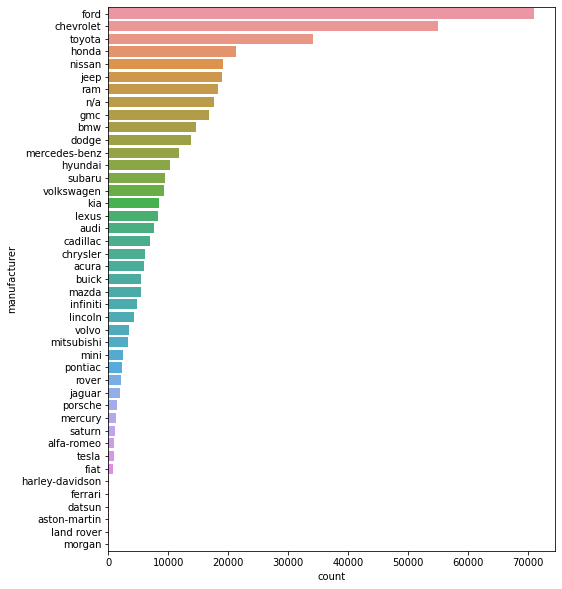

In [32]:
fig = plt.figure(figsize=(8,10))
sns.countplot(y='manufacturer', data=df.fillna('n/a'), order=df.fillna('n/a')['manufacturer'].value_counts().index)

In [33]:
df['model'].value_counts()

f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
1500 crew cab 6ft 4 bed       1
Karma Revero                  1
wrx sti launch edition        1
lighting                      1
cl550 5.5l v8                 1
Name: model, Length: 29667, dtype: int64

In [35]:
for model, num in zip(df['model'].value_counts().index, df['model'].value_counts()):
  print(model, num)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
savana g2500 4.8l 1
terrain slt-1 awd 1
civic ls 1
rs3 1
silverado 1500 3dr ext cab 143.5" wb ls 1
peterbilt cabover 1
chevolet silverado 3500HD 1
c/k20 1
TRACTOR 1
geo tracker convertible 1
silverado 2500 lt 4x4 v8 6.0l automatic crew cab short bed 1owner 1
q5 2.0t quattro premium plu 1
K2500 HD Silverado 1
rendezvous cxl suv 1
mazda6 touring automatic 1
montero sport xls 1
Dode caliber 1
201Subaru Legacy Limited AWD 1
3 series 320i sedan 4d 1
z4 z3 tt z 330ci sc430 1
1966 C-30 1 ton 1
Miata MX-5 RF 1
outback wagon limited 1 owner nice!! 1
nx300 awd 1
Jayco Jay Feather 1
Mainline Tudor Sedan 1
camry hybrid | gas saver, 1
mazda3 touring 1
1940 LaSalle 1
highlander le - awd suv - local - clean car fax 1
hoghlander 1
Escalade ESV AWD 1
yukon denali xl 4wd 1
five window coupe 1
impala police package 1
citation 1
'50 Business Coupe 1
venza wagon 1
dakota 4x4 quad cab 1
Land+Rover Discovery 1
lifted f150 xl 4x4 1/2 ton 1
quad cab pu 1
a3 s line 1
1972 B-G

In [ ]:
sns.countplot(y='model', data=df.fillna('n/a'), order=df.fillna('n/a')['model'].value_counts().index)

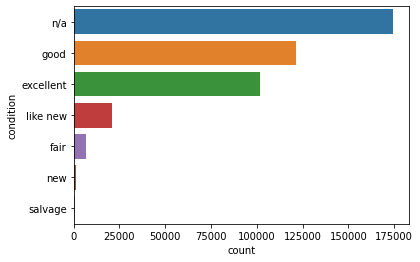

In [38]:
sns.countplot(y='condition', data=df.fillna('n/a'), order=df.fillna('n/a')['condition'].value_counts().index)

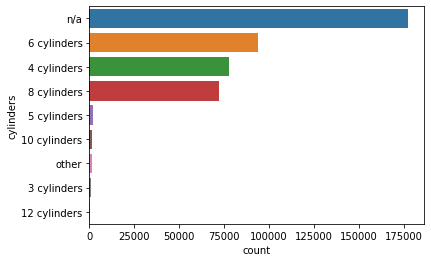

In [41]:
sns.countplot(y='cylinders', data=df.fillna('n/a'), order=df.fillna('n/a')['cylinders'].value_counts().index)

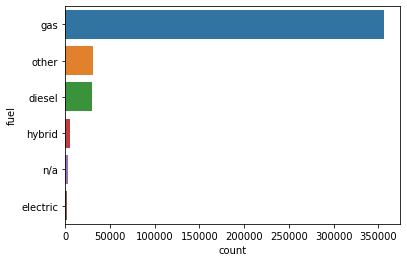

In [42]:
sns.countplot(y='fuel', data=df.fillna('n/a'), order=df.fillna('n/a')['fuel'].value_counts().index)

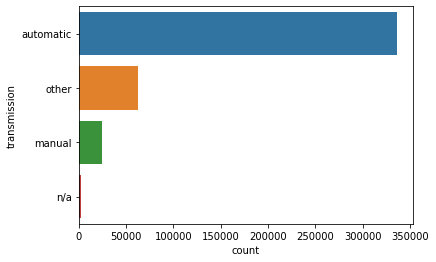

In [44]:
sns.countplot(y='transmission', data=df.fillna('n/a'), order=df.fillna('n/a')['transmission'].value_counts().index)


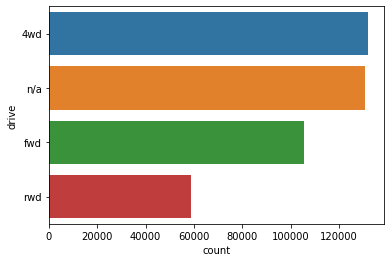

In [45]:
sns.countplot(y='drive', data=df.fillna('n/a'), order=df.fillna('n/a')['drive'].value_counts().index)


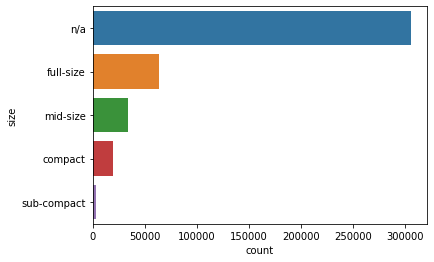

In [46]:
sns.countplot(y='size', data=df.fillna('n/a'), order=df.fillna('n/a')['size'].value_counts().index)


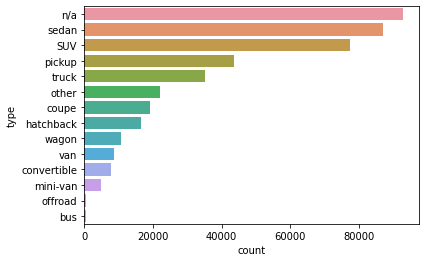

In [47]:
sns.countplot(y='type', data=df.fillna('n/a'), order=df.fillna('n/a')['type'].value_counts().index)

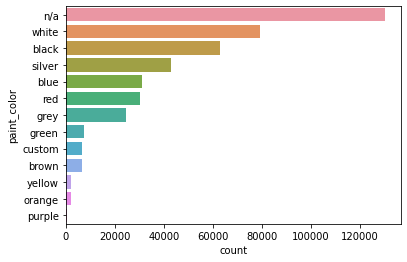

In [48]:
sns.countplot(y='paint_color', data=df.fillna('n/a'), order=df.fillna('n/a')['paint_color'].value_counts().index)

### 문제 6. 수치형 데이터의 통계 분석하기

In [51]:
# 수치형 데이터의 값의 범위, 기초 통계 분석하기
df.columns





Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'county', 'age'],
      dtype='object')

In [ ]:
sns.histplot(x='price', data=df) #메모리 터저서 실행불가 

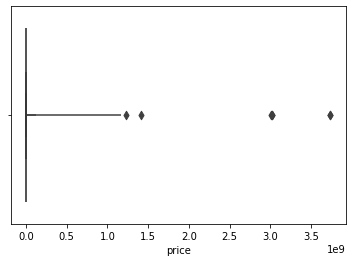

In [52]:
sns.boxenplot(x='price', data=df)

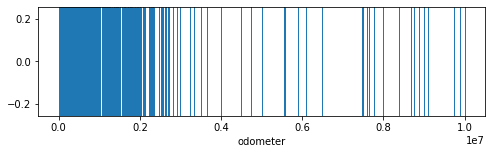

In [53]:
fig = plt.figure(figsize=(8,2))
sns.rugplot(x='odometer', data=df, height=1)

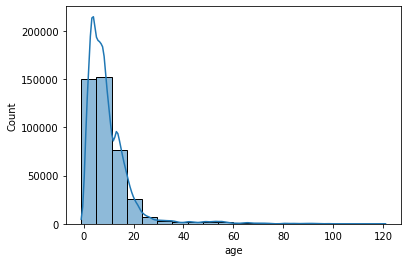

In [55]:
sns.histplot(x='age', data=df, bins=20, kde=True)

## Step 3. 데이터 클리닝 수행하기

### 문제 7. 범주형 데이터 시각화하여 분석하기

In [57]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'county', 'age'],
      dtype='object')

### 문제 8. 범주형 데이터 클리닝하기

In [62]:
# 범주형 데이터를 아래 방법 중 적절히 판단하여 처리하기
# 1. 결손 데이터가 포함된 Row를 제거
# 2. 결손 데이터를 others 범주로 변경하기
# 3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기
# 4. (classifier를 학습해서, 결손 데이터를 추정해서 채워널기)
df['manufacturer'].fillna('others').value_counts()









ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
others             17646
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63


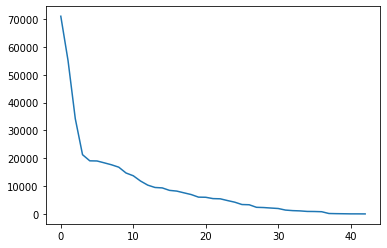

In [65]:
col = 'manufacturer'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)

In [71]:
n_categorical = 10
counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in counts.index[n_categorical:] else 'others')

In [72]:
df[col].value_counts()

others       139807
ford          70985
chevrolet     55064
toyota        34202
honda         21269
nissan        19067
jeep          19014
ram           18342
gmc           16785
bmw           14699
Name: manufacturer, dtype: int64

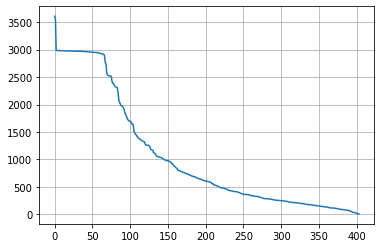

In [73]:
col = 'region'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [74]:
n_categorical = 5
df[col] = df[col].apply(lambda s : s if str(s) not in counts.index[n_categorical:] else 'others')

In [75]:
df[col].value_counts()

others                     410754
columbus                     3608
jacksonville                 3562
spokane / coeur d'alene      2988
eugene                       2985
fresno / madera              2983
Name: region, dtype: int64

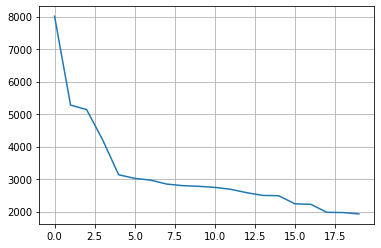

In [79]:
col = 'model'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts[:20])), counts[:20])

In [82]:
n_categorical = 10
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')


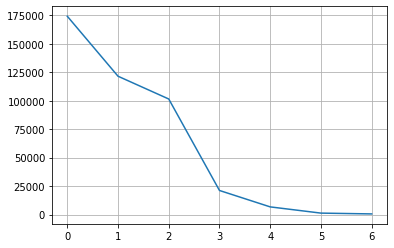

In [83]:
col = 'condition'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [84]:
n_categorical = 3
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')


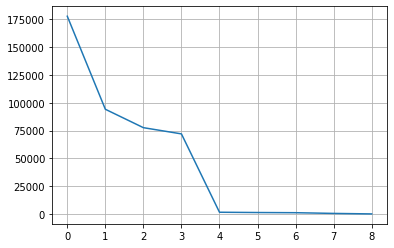

In [85]:
col = 'cylinders'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [86]:
n_categorical = 4
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')


In [87]:
df[col].value_counts()

6 cylinders    94169
4 cylinders    77642
8 cylinders    72062
others          5329
Name: cylinders, dtype: int64

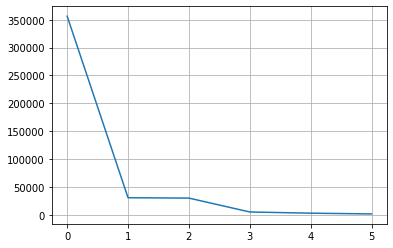

In [88]:
col = 'fuel'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [108]:
n_categorical = 1
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')


In [109]:
counts.fillna('others').index

Index(['gas', 'other', 'diesel', 'hybrid', 'others', 'electric'], dtype='object')

In [110]:
df[col].value_counts()

gas       356209
others     67658
Name: fuel, dtype: int64

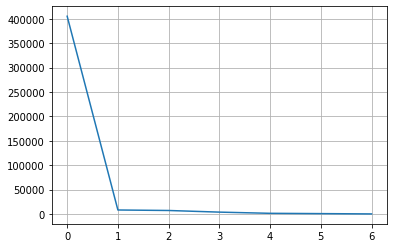

In [111]:
col = 'title_status'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [112]:
df.drop('title_status', axis=1, inplace=True)

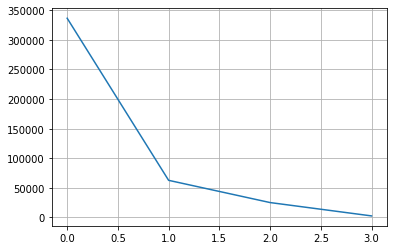

In [113]:
col = 'transmission'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [114]:
n_categorical = 3
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')
df[col].fillna('others', inplace=True)

In [115]:
df[col].value_counts()

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

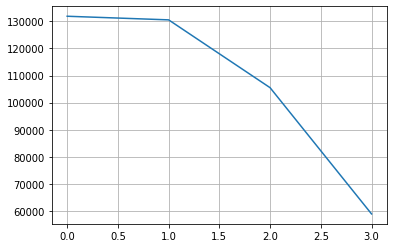

In [116]:
col = 'drive'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [ ]:
col = 'size'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [ ]:
n_categorical = 3
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')


In [117]:
df[col].value_counts()

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64

In [118]:
df[col].fillna('others', inplace=True)

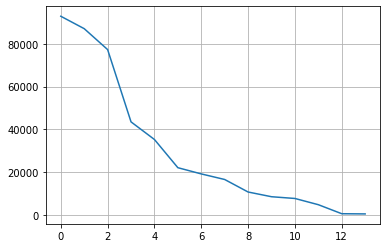

In [119]:
col = 'type'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [121]:
df[col].value_counts()

sedan        87056
SUV          77284
pickup       43510
truck        35279
others       32981
other        22110
coupe        19204
hatchback    16598
Name: type, dtype: int64

In [124]:
df.loc[df[col] == ' other', col] ='others'

In [ ]:
df[col].dillna('others', inplace=True)

In [120]:
n_categorical = 8
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

In [127]:
df[col].value_counts()

sedan        87056
SUV          77284
pickup       43510
truck        35279
others       32981
other        22110
coupe        19204
hatchback    16598
Name: type, dtype: int64

In [128]:
df[col].fillna('others', inplace=True)

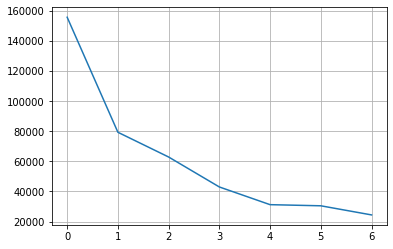

In [134]:
col = 'paint_color'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [135]:
n_categorical = 7
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

In [136]:
df[col].value_counts()

white     79285
black     62861
silver    42970
blue      31223
red       30473
others    25449
grey      24416
Name: paint_color, dtype: int64

In [140]:
df[col].fillna('others', inplace=True)

In [141]:
df[col].value_counts()

others    155652
white      79285
black      62861
silver     42970
blue       31223
red        30473
grey       24416
Name: paint_color, dtype: int64

### 문제 9. 수치형 데이터 시각화하여 분석하기

In [ ]:
# Seaborn을 이용하여 범주형 데이터를 시각화하여 분석하기
# Hint) 값의 범위가 너무 넓을 경우 histplot() 등이 잘 동작하지 않으므로, rugplot을 활용




### 문제 10. 수치형 데이터 클리닝하기

In [ ]:
# quantile() 메소드를 이용하여 outlier 제거하고 시각화하여 확인하기






### 문제 11. 컬럼간의 Correlation Heatmap으로 시각화하기

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
X_num =

# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat =

# 입출력 데이터 통합하기
X = 
y = 

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 

## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_reg = 




### 문제 15. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = 





## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용






### 문제 17. 에러 값의 히스토그램 확인하기


In [ ]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test



